In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks


In [2]:
df = pd.read_csv('train_rows.csv') #class is given for each molecule
df

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3.000,1.7389,1,0,0,0,0,25.0,2,0,...,0,0,0,6.867,2.083,0,11.561,0,1,0
833,5.051,3.5320,0,0,2,0,0,30.0,2,6,...,0,2,6,3.519,2.435,1,8.710,0,0,0
834,4.876,2.8477,0,0,2,0,0,30.0,2,2,...,0,3,2,3.631,2.900,2,8.126,0,0,0
835,4.953,3.4085,0,0,2,0,2,40.0,1,2,...,1,2,0,3.853,2.803,1,8.521,0,0,0


In [3]:
df.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,Class
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,...,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,4.772814,3.063264,0.740741,0.043011,0.953405,0.260454,1.657109,36.899403,1.408602,1.824373,...,0.923536,1.267622,0.996416,3.932927,2.549554,0.700119,8.640417,0.053763,0.666667,0.339307
std,0.543712,0.801494,1.508644,0.255213,2.081240,0.956732,2.294311,9.150890,2.056690,1.798186,...,1.586843,2.229117,1.311975,1.044073,0.616865,1.102265,1.287319,0.329166,1.951567,0.473757
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.267000,1.500000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.476000,2.493700,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.480000,2.100000,0.000000,7.982000,0.000000,0.000000,0.000000
50%,4.825000,3.054900,0.000000,0.000000,0.000000,0.000000,0.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,1.000000,3.718000,2.467000,0.000000,8.506000,0.000000,0.000000,0.000000
75%,5.119000,3.455000,1.000000,0.000000,1.000000,0.000000,3.000000,42.900000,2.000000,3.000000,...,2.000000,2.000000,2.000000,3.992000,2.881000,1.000000,9.032000,0.000000,0.000000,1.000000
max,6.330000,7.918400,12.000000,3.000000,16.000000,13.000000,18.000000,60.000000,24.000000,12.000000,...,12.000000,18.000000,7.000000,10.695000,5.742000,6.000000,14.700000,4.000000,27.000000,1.000000


In [4]:
df.shape

(837, 42)

In [5]:
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1


In [6]:
X = df.drop('Class', axis=1)  # Features (properties) no Class variable drop your traget variable
y = df['Class'].values

In [7]:
df['Class'].unique()

array([1, 0])

In [8]:
pd.unique(y)

array([1, 0])

In [9]:
X.shape

(837, 41)

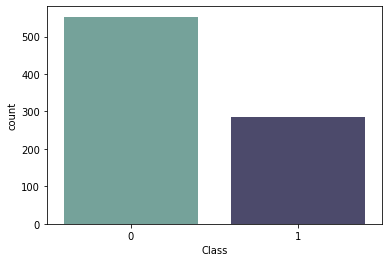

In [10]:
cols= ["#6daa9f","#474571"]
sns.countplot(x= df["Class"], palette= cols)

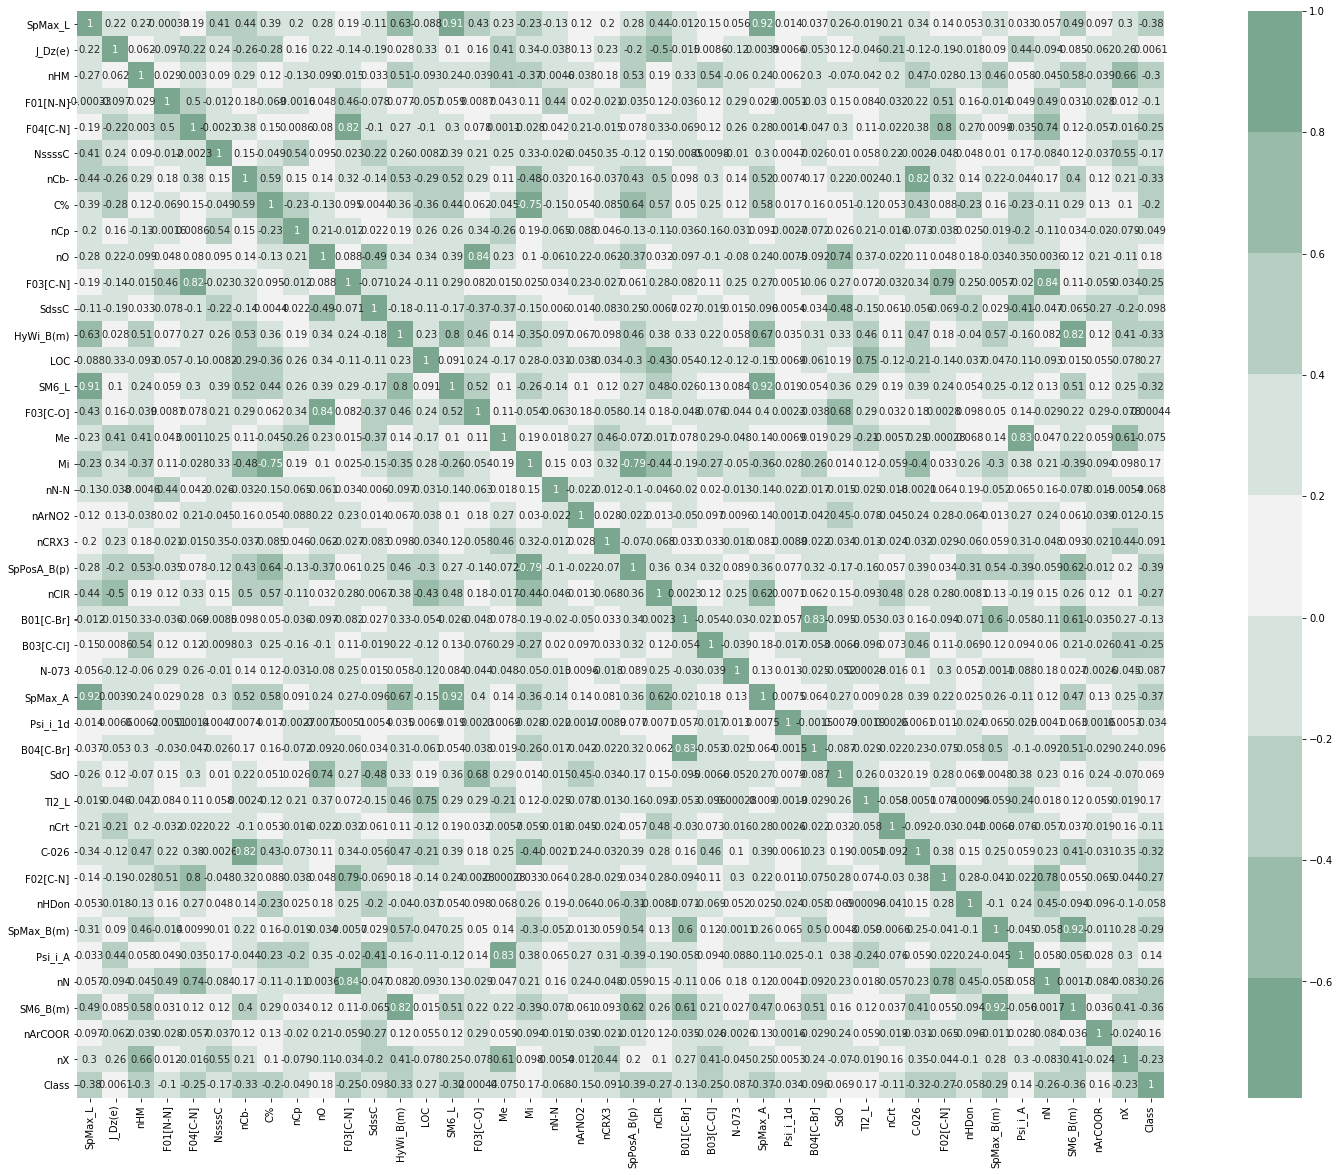

In [11]:
#Examaning a corelation matrix of all the features
cmap = sns.diverging_palette(150,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(30,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[ 0.73088363 -0.57627693  1.50573347 ...  0.60489047 -0.16172957
   1.11716177]
 [ 0.78216852 -1.5868624  -0.50224465 ...  0.36808873 -0.16172957
  -0.34733442]
 [ 0.51841765  0.12478493 -0.50224465 ...  0.09414163  5.84921951
  -0.34733442]
 ...
 [ 0.02388476 -1.68353552  2.17505951 ...  0.96473625 -0.16172957
  -0.34733442]
 [-1.56961009  0.1942006  -0.50224465 ... -0.81514608 -0.16172957
  -0.34733442]
 [ 0.94701282 -1.03408111 -0.50224465 ...  0.45940444 -0.16172957
  -0.34733442]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (No

67/67 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9178 - val_loss: 0.3886 - val_accuracy: 0.8731
Epoch 40/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9215 - val_loss: 0.4361 - val_accuracy: 0.8806
Epoch 41/500
67/67 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9084 - val_loss: 0.4252 - val_accuracy: 0.8433
Epoch 42/500
67/67 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.8953 - val_loss: 0.3795 - val_accuracy: 0.8507
Epoch 43/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9271 - val_loss: 0.3467 - val_accuracy: 0.8731
Epoch 44/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9215 - val_loss: 0.3339 - val_accuracy: 0.8731
Epoch 45/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9364 - val_loss: 0.3659 - val_accuracy: 0.8582
Epoch 46/500
67/67 

Epoch 97/500
67/67 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9514 - val_loss: 0.5016 - val_accuracy: 0.8881
Epoch 98/500
67/67 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9570 - val_loss: 0.4728 - val_accuracy: 0.8881
Epoch 99/500
67/67 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9589 - val_loss: 0.5190 - val_accuracy: 0.9030
Epoch 100/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.8841 - val_loss: 0.5247 - val_accuracy: 0.8134
Epoch 101/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9402 - val_loss: 0.6290 - val_accuracy: 0.8881
Epoch 102/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9458 - val_loss: 0.5787 - val_accuracy: 0.8806
Epoch 103/500
67/67 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9458 - val_loss: 0.4829 - val_accuracy: 0.8657
Ep

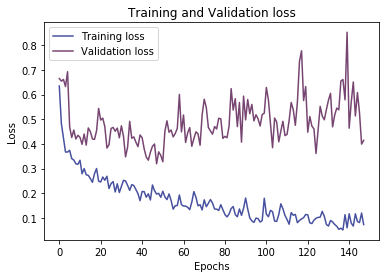

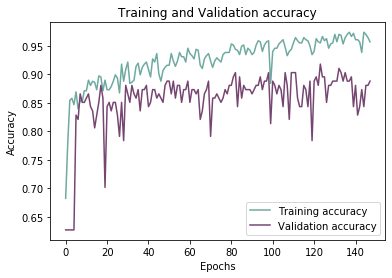

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       108
           1       0.82      0.67      0.73        60

   micro avg       0.83      0.83      0.83       168
   macro avg       0.82      0.79      0.80       168
weighted avg       0.83      0.83      0.82       168
 samples avg       0.83      0.83      0.83       168



In [12]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)
#y_train = np.argmax(y_train)
print(y_train)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 41))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN

model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

print(model.summary())

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 8, epochs = 500, callbacks=[early_stopping], validation_split=0.2)

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#47519f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

print(classification_report(y_test, y_pred))

